<a href="https://colab.research.google.com/github/Sandermi99/MEDT4165/blob/main/Exercise1_SPUltrasound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#Importing libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal



500


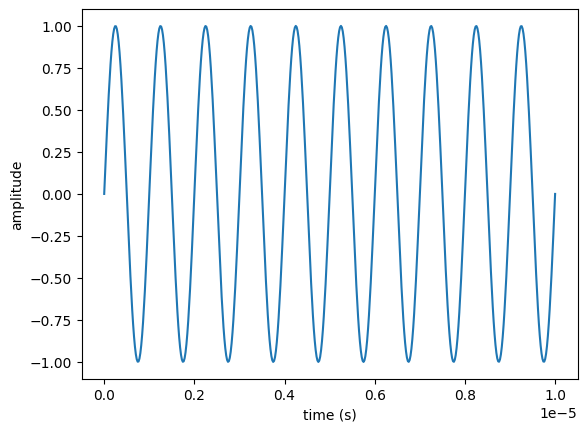

In [27]:
#Signal generation and plotting

f0 = 1e6
fc = 50e6
tstart = 0
tstop = 10e-6
N = int(fc*tstop)
t = np.linspace(tstart, tstop, N)
y = np.sin(2*np.pi*f0*t)
print(N)
plt.xlabel("time (s)")
plt.ylabel("amplitude")
plt.plot(t, y)
plt.show()

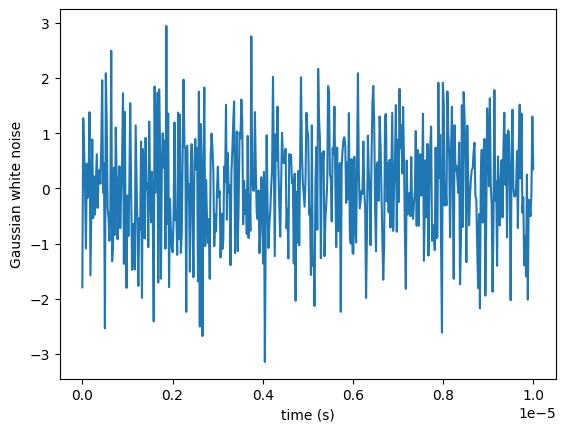

In [28]:
#generating noise

n = np.random.normal(0, 1, N)
plt.xlabel("time (s)")
plt.ylabel("Gaussian white noise")
plt.plot(t, n)
plt.show()

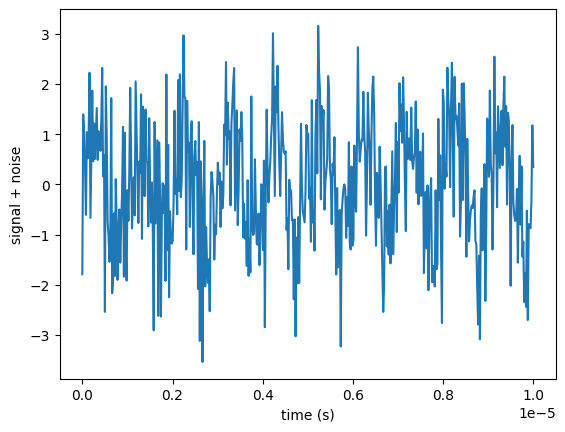

In [29]:
#Adding noise and signal

y_noisy = y + n
plt.xlabel("time (s)")
plt.ylabel("signal + noise")
plt.plot(t, y_noisy)
plt.show()

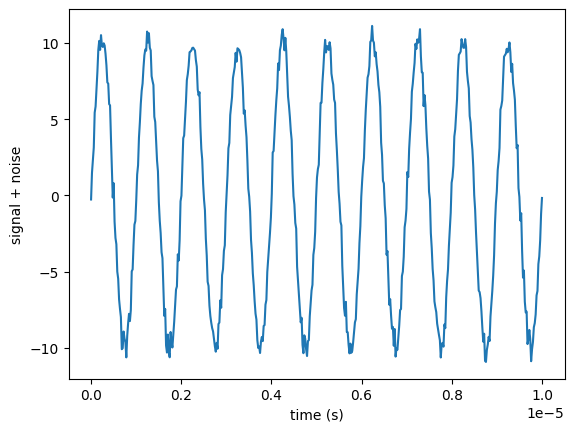

In [31]:
#Scenarios with either noise dominace or signal dominance
#a high SNR
sig_amp_high = 10
noise_amp_low = 0.5
n_scen_a = np.random.normal(0, noise_amp_low, N)

y_dominant = sig_amp_high*y + n_scen_a
plt.xlabel("time (s)")
plt.ylabel("signal + noise")
plt.plot(t, y_dominant)
plt.show()
#b low SNR



